#  Creating  Functions

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
new_cols = [col.replace(" ", "_").lower() for col in data]
data.columns = new_cols

In [4]:
data_cat=data.select_dtypes(include=object)
data_num=data.select_dtypes(include=np.number)

In [9]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
len(data_num['customer_lifetime_value'].unique())

8041

# What do we want the function to accomplish

In [5]:

continuous_df=[]
discrete_df= []


for i in data_num.columns:

    if len(data_num[i].unique()) > 200:
        continuous_df.append(i)
              
    else:
        discrete_df.append(i)

display(continuous_df)
display(discrete_df)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

# Use the code to create a general function

In [13]:
def cont_disc(df):    #df = dataframe to pass function to

    continuous_lst=[]   # set up empty lists
    discrete_lst= []


    for col in df.columns:

        if len(df[col].unique()) > 200:
            continuous_lst.append(col)
              
        else:
            discrete_lst.append(col)

    return discrete_lst,continuous_lst

In [15]:
disc_var, cont_var = cont_disc(data_num)
print('continuous=  ',cont_var)
print('Discrete = ',disc_var)

continuous=   ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
Discrete =  ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


In [27]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.01):   # Discrete is defined here as less than 1% of the number of unique values
            discrete_lst.append(col)
            
        else:
            continuous_lst.append(col)      
            
    cont_df = df[continuous_lst]    #create dataframe inside function
    disc_df = df[discrete_lst]
            
    return disc_df, cont_df
   

In [25]:
discrete_df, continuous_df = discrete_continuous(data_num)

In [26]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [20]:
9134*0.005

45.67

# Do you have many lines of Repeated code??

In [28]:
print(len(data_num['customer_lifetime_value'].value_counts()))
print(len(data_num['income'].value_counts()))
print(len(data_num['monthly_premium_auto'].value_counts()))
print(len(data_num['months_since_last_claim'].value_counts()))
print(len(data_num['months_since_policy_inception'].value_counts()))
print(len(data_num['number_of_open_complaints'].value_counts()))
print(len(data_num['number_of_policies'].value_counts()))
print(len(data_num['total_claim_amount'].value_counts()))

8041
5694
202
36
100
6
9
5106


# A loop can help with this

In [29]:
for col in data_num.columns:
            print (col,':     ',len(data_num[col].value_counts()))

customer_lifetime_value :      8041
income :      5694
monthly_premium_auto :      202
months_since_last_claim :      36
months_since_policy_inception :      100
number_of_open_complaints :      6
number_of_policies :      9
total_claim_amount :      5106


# A function makes it available to ANY dataframe

In [31]:
def value_count(df):
    for columns in df:
            print (columns,':     ',len(df[columns].value_counts()))
    return


In [34]:
value_count(data_num)

customer_lifetime_value :      8041
income :      5694
monthly_premium_auto :      202
months_since_last_claim :      36
months_since_policy_inception :      100
number_of_open_complaints :      6
number_of_policies :      9
total_claim_amount :      5106


In [33]:
data_cat = data_cat.drop(['customer','effective_to_date'], axis = 1)

# Plotting multiple features

<IPython.core.display.Javascript object>

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

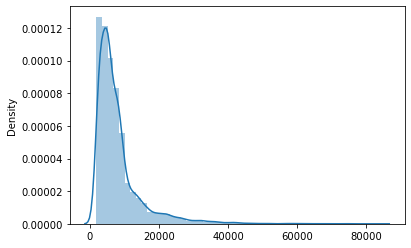

<IPython.core.display.Javascript object>

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

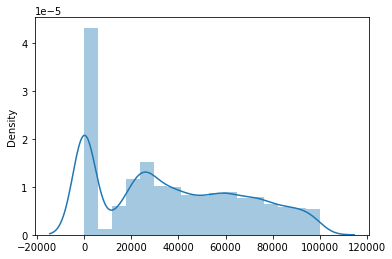

<IPython.core.display.Javascript object>

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

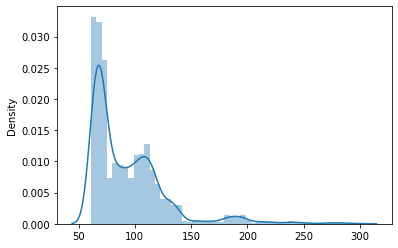

<IPython.core.display.Javascript object>

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

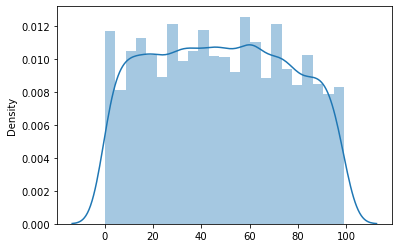

<IPython.core.display.Javascript object>

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

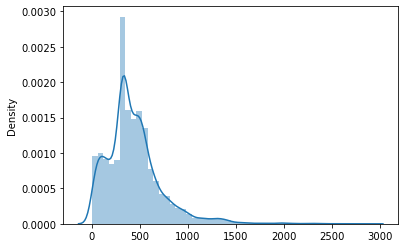

In [44]:
for column in continuous_df.columns:
        sns.distplot(x=continuous_df[column])
        plt.show()

In [37]:
def plot_categorical(df):
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None
   




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

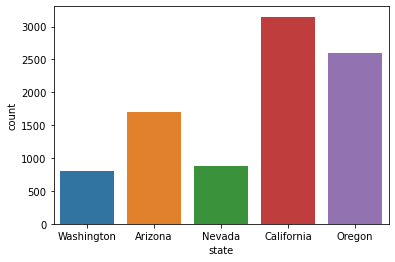

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

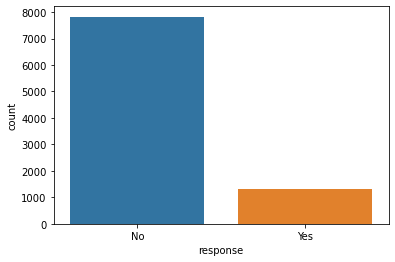

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

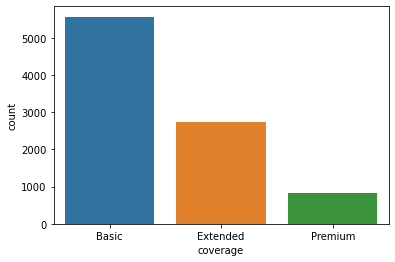

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

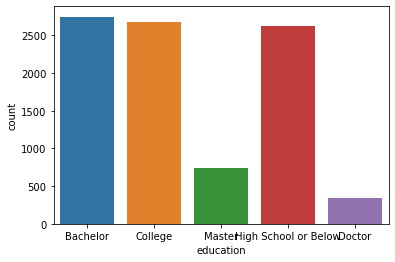

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

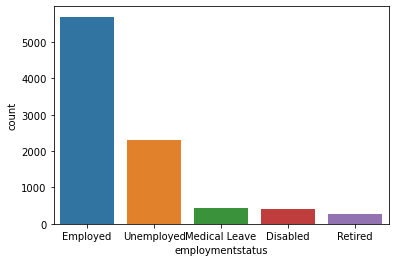

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

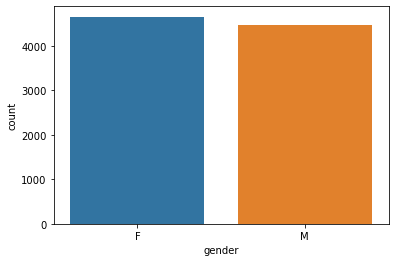

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

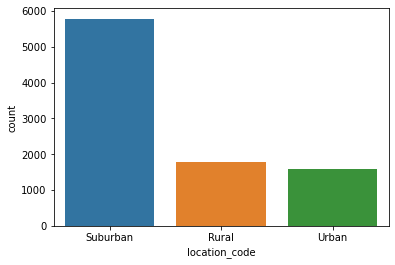

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

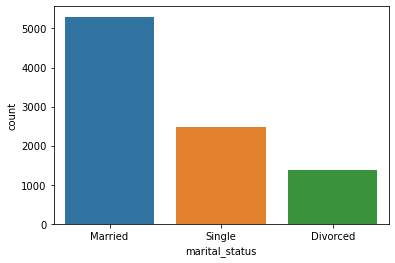

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

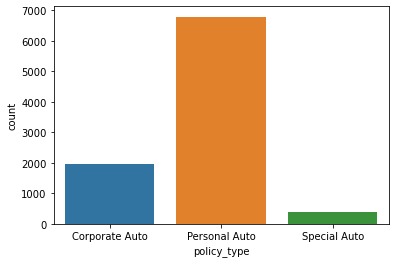

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

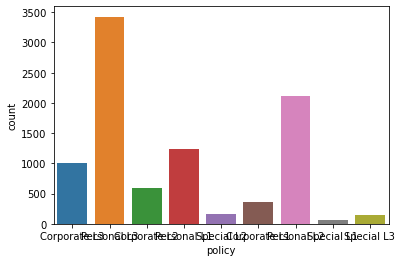

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

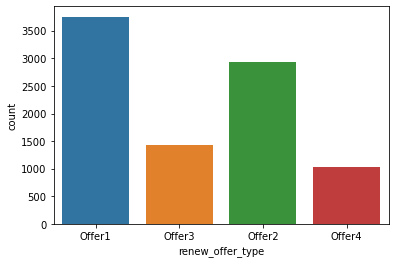

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

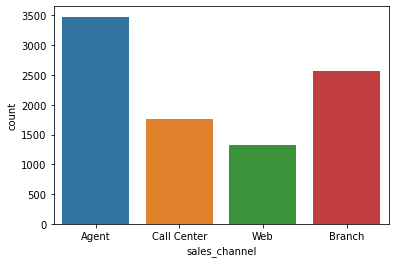

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

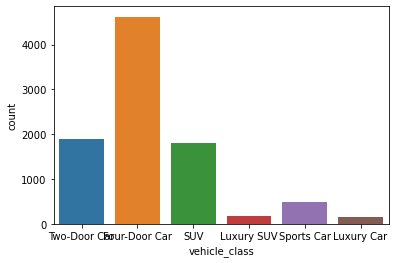

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

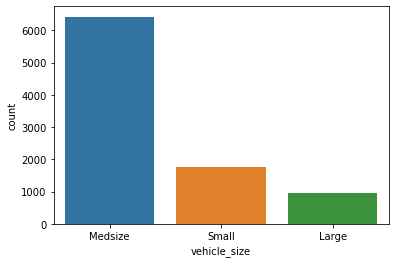

In [40]:
plot_cat(data_cat)